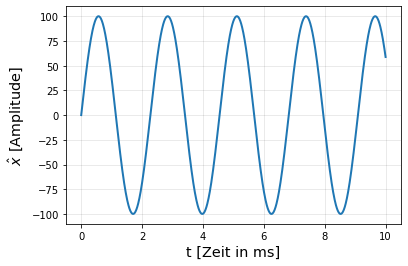

In [10]:
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt

#~~~~~~~~~~~~~~~~~~~Settings~~~~~~~~~~~~~~~~~~~~~~~~~
#Sound select: Stimmgabel, Horn, Klarinette
Sound='Stimmgabel'   

#Language select: DE EN
Language = 'DE'

#Duration select
seconds = 5   # note duration in seconds

#Volume select
volume = 0.2     # range [0.0, 1.0]

#Framerate
fs = 44100 #samples per second

#X-Achses
T = 10 # ms
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


#~~~~~~~~~~~~~~~~~~~~~~~~~~define classes
class Function():
    N = 100 # Number of samplepoints # Printing Time X-Achses
    t = np.linspace(0, T, T*N)
    t_tone = np.linspace(0.0, seconds, seconds * fs)
    
    v_plot = 0
    v_tone = 0
    
    def sin(self,a,f,angle_deg,k):
        phi = angle_deg * (np.pi/180)
        
        self.v_plot = a*np.sin(2 * np.pi * f * k * self.t/1000 + phi * k)
        self.v_tone = a * np.sin(2 * np.pi * f * k * self.t_tone + phi * k)
        
        return 
    
class Plot():
    language = "XX"  
    
    def plot(self,X,Y):
        plt.plot(X,Y,linewidth = 2)
        plt.grid(visible=True, color='black', linestyle='-',alpha=0.1)
        
        if(self.language == "DE"):
            plt.ylabel(r'$\hat x$ [Amplitude]', fontsize='x-large')
            axes1 = plt.gca()
            axes1.set_xlabel("t [Zeit in ms]", fontsize='x-large')
        else: 
            plt.ylabel(r'$\hat x$ [amplitude]', fontsize='x-large')
            axes1 = plt.gca()
            axes1.set_xlabel("t [time in ms]", fontsize='x-large')

#~~~~~~~~~~~~~~~~~~~~~~~~~~generate funktions
graph1=Plot()
graph2=Plot()
graph3=Plot()
    
fx_1_1=Function()

fx_2_1=Function()
fx_2_2=Function()
fx_2_3=Function()
fx_2_4=Function()
fx_2_5=Function()

fx_3_1=Function()
fx_3_2=Function()
fx_3_3=Function()
fx_3_4=Function()
fx_3_5=Function()
fx_3_6=Function()
fx_3_7=Function()

#~~~~~~~~~~~~~~~~~~~~~~~~~~define Sine
fx_1_1.sin(100, 440, 0, 1)
  
fx_2_1.sin(50, 440, 0, 1)
fx_2_2.sin(60, 440, 0, 2)
fx_2_3.sin(100, 440, 0, 3)
fx_2_4.sin(50, 440, 0, 4)
fx_2_5.sin(20, 440, 0, 5)

fx_3_1.sin(70, 440, 0, 1)
fx_3_2.sin(30, 440, 0, 2)
fx_3_3.sin(85, 440, 0, 3)
fx_3_4.sin(40, 440, 0, 4)
fx_3_5.sin(65, 440, 0, 5)
fx_3_6.sin(40, 440, 0, 6)
fx_3_7.sin(55, 440, 0, 7)

#~~~~~~~~~~~~~~~~~~~~~~~~~~define instrument
Stimmgabel = fx_1_1.v_tone
Horn = fx_2_1.v_tone+fx_2_2.v_tone+fx_2_3.v_tone+fx_2_4.v_tone+fx_2_5.v_tone
Klarinette = fx_3_1.v_tone+fx_3_2.v_tone+fx_3_3.v_tone+fx_3_4.v_tone+fx_3_5.v_tone+fx_3_6.v_tone+fx_3_7.v_tone

Stimmgabel_plot = fx_1_1.v_plot
Horn_plot = fx_2_1.v_plot+fx_2_2.v_plot+fx_2_3.v_plot+fx_2_4.v_plot+fx_2_5.v_plot
Klarinette_plot = fx_3_1.v_plot+fx_3_2.v_plot+fx_3_3.v_plot+fx_3_4.v_plot+fx_3_5.v_plot+fx_3_6.v_plot+fx_3_7.v_plot


#~~~~~~~~~~~~~~~~~~~~~~~~~~select instrument

if Sound =='Klarinette':
    samples = Klarinette
    graph3.language = Language
    graph3.plot(fx_1_1.t,Klarinette_plot)
    plt.show()
    
elif Sound == 'Horn':
    samples = Horn
    graph2.language = Language
    graph2.plot(fx_1_1.t,Horn_plot)
    plt.show()
    
else:
    samples = Stimmgabel
    graph1.language = Language
    graph1.plot(fx_1_1.t,Stimmgabel_plot)
    plt.show()


#~~~~~~~~~~~~~~~~~~~~~~~~~~output sound
data = samples / max(samples)
data *= volume

Audio(data = data, rate = fs, normalize = False)